# Model building for Vehicle Resale Value Prediction

## Importing the libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

%matplotlib inline

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 

## Importing the clean dataset

In [2]:
dataset=pd.read_csv('ML_data.csv',encoding='cp1252')
dataset

,Unnamed: 0,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
0,1,coupe,2011,manuell,190,125000,5,diesel,audi,ja,18300
1,3,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein,1500
2,4,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein,3600
3,5,limousine,1995,manuell,102,150000,10,benzin,bmw,ja,650
4,6,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein,2200
...,...,...,...,...,...,...,...,...,...,...,...
236508,371518,kombi,2005,manuell,3,150000,5,diesel,bmw,nein,3999
236509,371520,limousine,2004,manuell,225,150000,5,benzin,seat,ja,3200
236510,371521,bus,2000,manuell,0,150000,3,benzin,opel,nein,1150
236511,371524,cabrio,2000,automatik,101,125000,3,benzin,smart,nein,1199


## Seperating independent and dependent variables

In [3]:
x=dataset.iloc[:,1:-1].values
x

array([['coupe', 2011, 'manuell', ..., 'diesel', 'audi', 'ja'],
       ['kleinwagen', 2001, 'manuell', ..., 'benzin', 'volkswagen',
        'nein'],
       ['kleinwagen', 2008, 'manuell', ..., 'diesel', 'skoda', 'nein'],
       ...,
       ['bus', 2000, 'manuell', ..., 'benzin', 'opel', 'nein'],
       ['cabrio', 2000, 'automatik', ..., 'benzin', 'smart', 'nein'],
       ['bus', 1996, 'manuell', ..., 'diesel', 'volkswagen', 'nein']],
      dtype=object)

In [4]:
x.shape

(236513, 9)

In [5]:
y=dataset.iloc[:,-1].values
y

array([18300,  1500,  3600, ...,  1150,  1199,  9200], dtype=int64)

In [6]:
y.shape

(236513,)

In [7]:
x[0]

array(['coupe', 2011, 'manuell', 190, 125000, 5, 'diesel', 'audi', 'ja'],
      dtype=object)

## applying OneHotEncoding and LabelEncoding

In [8]:
ct=ColumnTransformer([('on',OneHotEncoder(),[0])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 0.0, ..., 'diesel', 'audi', 'ja'],
       [0.0, 0.0, 0.0, ..., 'benzin', 'volkswagen', 'nein'],
       [0.0, 0.0, 0.0, ..., 'diesel', 'skoda', 'nein'],
       ...,
       [0.0, 1.0, 0.0, ..., 'benzin', 'opel', 'nein'],
       [0.0, 0.0, 1.0, ..., 'benzin', 'smart', 'nein'],
       [0.0, 1.0, 0.0, ..., 'diesel', 'volkswagen', 'nein']], dtype=object)

In [9]:
import joblib
joblib.dump(ct,'transform')

['transform']

In [10]:
x=x[:,1:]
x.shape

(236513, 15)

In [11]:
x[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2011, 'manuell', 190, 125000, 5,
       'diesel', 'audi', 'ja'], dtype=object)

In [12]:
ct=ColumnTransformer([('on',OneHotEncoder(),[8])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 'diesel', 'audi', 'ja'],
       [0.0, 1.0, 0.0, ..., 'benzin', 'volkswagen', 'nein'],
       [0.0, 1.0, 0.0, ..., 'diesel', 'skoda', 'nein'],
       ...,
       [0.0, 1.0, 1.0, ..., 'benzin', 'opel', 'nein'],
       [1.0, 0.0, 0.0, ..., 'benzin', 'smart', 'nein'],
       [0.0, 1.0, 1.0, ..., 'diesel', 'volkswagen', 'nein']], dtype=object)

In [13]:
joblib.dump(ct,'transform1')

['transform1']

In [14]:
x.shape

(236513, 16)

In [15]:
x[0]

array([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2011, 190, 125000, 5,
       'diesel', 'audi', 'ja'], dtype=object)

In [16]:
ct=ColumnTransformer([('on',OneHotEncoder(),[13])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 0.0, ..., 5, 'audi', 'ja'],
       [0.0, 1.0, 0.0, ..., 6, 'volkswagen', 'nein'],
       [0.0, 0.0, 0.0, ..., 7, 'skoda', 'nein'],
       ...,
       [0.0, 1.0, 0.0, ..., 3, 'opel', 'nein'],
       [0.0, 1.0, 0.0, ..., 3, 'smart', 'nein'],
       [0.0, 0.0, 0.0, ..., 3, 'volkswagen', 'nein']], dtype=object)

In [17]:
joblib.dump(ct,'transform2')

['transform2']

In [18]:
x=x[:,1:]
x.shape

(236513, 21)

In [19]:
x[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 2011, 190, 125000, 5, 'audi', 'ja'], dtype=object)

In [20]:
ct=ColumnTransformer([('on',OneHotEncoder(),[19])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 125000, 5, 'ja'],
       [0.0, 0.0, 0.0, ..., 150000, 6, 'nein'],
       [0.0, 0.0, 0.0, ..., 90000, 7, 'nein'],
       ...,
       [0.0, 0.0, 0.0, ..., 150000, 3, 'nein'],
       [0.0, 0.0, 0.0, ..., 125000, 3, 'nein'],
       [0.0, 0.0, 0.0, ..., 150000, 3, 'nein']], dtype=object)

In [21]:
joblib.dump(ct,'transform3')

['transform3']

In [22]:
x=x[:,1:]
x.shape

(236513, 59)

In [23]:
x[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 2011, 190, 125000, 5, 'ja'], dtype=object)

In [24]:
ct=ColumnTransformer([('on',OneHotEncoder(),[-1])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[1.0, 0.0, 1.0, ..., 190, 125000, 5],
       [0.0, 1.0, 0.0, ..., 75, 150000, 6],
       [0.0, 1.0, 0.0, ..., 69, 90000, 7],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 150000, 3],
       [0.0, 1.0, 0.0, ..., 101, 125000, 3],
       [0.0, 1.0, 0.0, ..., 102, 150000, 3]], dtype=object)

In [25]:
joblib.dump(ct,'transform4')

['transform4']

In [26]:
x.shape

(236513, 60)

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 2.75225433, -2.75225433,  3.27053585, ...,  1.4996086 ,
        -0.16192709, -0.33635066],
       [-0.36333851,  0.36333851, -0.30576029, ..., -0.77153068,
         0.59816829, -0.04959663],
       [-0.36333851,  0.36333851, -0.30576029, ..., -0.8900249 ,
        -1.22606063,  0.2371574 ],
       ...,
       [-0.36333851,  0.36333851, -0.30576029, ..., -2.25270846,
         0.59816829, -0.90985871],
       [-0.36333851,  0.36333851, -0.30576029, ..., -0.25805571,
        -0.16192709, -0.90985871],
       [-0.36333851,  0.36333851, -0.30576029, ..., -0.23830667,
         0.59816829, -0.90985871]])

In [28]:
x[0]

array([ 2.75225433, -2.75225433,  3.27053585, -0.34873538, -0.06885439,
       -0.06489945, -0.12372632, -0.05337956, -0.03833152, -0.0465321 ,
       -0.16195443, -0.27531342, -0.0904676 , -0.10638819, -0.03405646,
       -0.04385485, -0.08820757, -0.02186329, -0.03545876, -0.03920661,
       -0.12965245, -0.31723641, -0.10479151, -0.09225568, -0.11961074,
       -0.34947468, -0.18591736, -0.03323782, -0.22601947, -0.03436615,
       -0.04095283, -0.1433608 , -0.13496269, -0.11800033, -0.06204553,
       -0.04579626, -0.08320143, -0.12330292, -0.02157098, -0.52040725,
       -0.10082243, -1.38284324, -0.04375796,  1.4415663 , -0.01216574,
       -0.02759777, -0.12514539, -0.49096788,  0.49096788, -0.33124431,
       -0.26240212,  4.59301193, -0.56898339, -0.51927865, -0.63941141,
       -0.19618889,  1.50320592,  1.4996086 , -0.16192709, -0.33635066])

## Splitting Data Into Train And Test

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### Training, Testing and Evaluation of Model Using Decision Tree Regressor, Multi Linear Regression and Random Forest Regressor

## Multi Linear Regression:

In [30]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()

In [31]:
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred=mr.predict(x_test)
y_pred

array([ 1554.33017493,  6147.14658118, 10572.27158118, ...,
        -574.28310632,  6004.49095458,  -660.07079858])

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7132330369499291

## Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion='mse',random_state=0)

In [35]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [36]:
y_pred=dt.predict(x_test)
y_pred

array([1000., 4015., 4750., ...,  610., 2300., 1345.])

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8011791920592324

## Random Forest Regressor:

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,criterion='mse',random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [39]:
y_pred=rf.predict(x_test)
y_pred

array([ 989.37142857, 4231.075     , 9160.35      , ...,  586.41765873,
       4279.23333333, 1354.23333333])

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8682230655467761

## Cross Validation

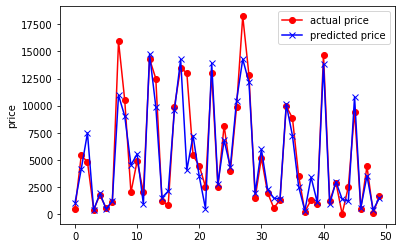

In [41]:
import random
num_samples=50
idx=random.sample(range(len(y_test)),num_samples) 
plt.plot(range(num_samples),y_test[idx],'ro-')
plt.plot(range(num_samples),y_pred[idx],'bx-')
plt.ylabel("price")
plt.legend(["actual price",'predicted price','mean price'])

In [42]:
x_train[0]

array([ 2.75225433, -2.75225433, -0.30576029, -0.34873538, -0.06885439,
       -0.06489945, -0.12372632, -0.05337956, -0.03833152, -0.0465321 ,
       -0.16195443, -0.27531342, -0.0904676 , -0.10638819, -0.03405646,
       -0.04385485, -0.08820757, -0.02186329, -0.03545876, -0.03920661,
       -0.12965245, -0.31723641, -0.10479151, -0.09225568, -0.11961074,
        2.86143764, -0.18591736, -0.03323782, -0.22601947, -0.03436615,
       -0.04095283, -0.1433608 , -0.13496269, -0.11800033, -0.06204553,
       -0.04579626, -0.08320143, -0.12330292, -0.02157098, -0.52040725,
       -0.10082243,  0.72314777, -0.04375796, -0.69368991, -0.01216574,
       -0.02759777, -0.12514539, -0.49096788,  0.49096788, -0.33124431,
       -0.26240212, -0.21772206, -0.56898339, -0.51927865,  1.56393831,
       -0.19618889, -0.94339063,  0.82814133,  0.59816829, -1.48336677])

In [43]:
import pickle
#saving the model
filename  = 'vehicleresaleprice.pkl'
scalerFile= 'scaler.pkl'
rf=RandomForestRegressor(n_estimators=20,criterion='mse',random_state=1)
pickle.dump(rf, open(filename, 'wb'))
pickle.dump(sc, open(scalerFile, 'wb'))

## Observation:

|Algorithm                |Accuracy             |Accuracy in %
|-------------------------|---------------------|--------------
|Multi Linear Regression  | 0.7132389211953192  | 71.3%
|Decision Tree Regressor  | 0.8011791920592324  | 80.1%
|Random Forest Regressor  | 0.8681639422469312  | 86.8%